### Section 1
#### Explanation of the choice of the dataset

#### Information of the dataset
1. Features (from https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/):
 - **duration_ms** - The duration of the track in milliseconds.
 - **key** - The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
 - **mode** - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
 - **time_signature** - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
 - **acousticness** - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
 - **danceability** - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 
 - **energy** - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. The distribution of values for this feature look like this: Energy distribution
 - **instrumentalness** - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
 - **liveness** - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
 - **loudness** - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
 - **speechiness** - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
 - **valence** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
 - **tempo** - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
 - **id** - The Spotify ID for the track.
 - **type** - The object type: “audio_features”
 - **popularity** - The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.

2. Number of entities: **6908**
3. Source address: https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks
4. Examples of problems: **Time-Series Analysis, Artist Recommendation, Popularity rating Prediction, Genre Differentiation, Hit Prediction**.


In [7]:
import numpy as np
import pandas as pd

spotify_data = pd.read_csv('dataset-of-80s.csv')
spotify_data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,6908.000000,6908.000000,6908.000000,6908.000000,6908.000000,6908.000000,6908.000000,6908.000000,6908.000000,6908.000000,6908.000000,6.908000e+03,6908.000000,6908.000000,6908.000000,6908.000000
mean,0.564258,0.608037,5.233353,-11.041894,0.687609,0.057906,0.293067,0.139863,0.201009,0.587922,120.649572,2.547564e+05,3.926317,39.755172,11.277649,0.500000
std,0.173084,0.242962,3.597246,4.681166,0.463502,0.057768,0.302950,0.288144,0.181664,0.263604,27.108127,1.073213e+05,0.356433,19.136360,4.472095,0.500036
min,0.065600,0.000276,0.000000,-39.940000,0.000000,0.022300,0.000001,0.000000,0.018600,0.000010,39.002000,2.951400e+04,1.000000,0.000000,1.000000,0.000000
25%,0.455000,0.436000,2.000000,-13.451000,0.000000,0.032700,0.033375,0.000003,0.084900,0.383000,102.608500,2.045468e+05,4.000000,27.441758,9.000000,0.000000
50%,0.582000,0.637000,5.000000,-10.662000,1.000000,0.040600,0.172000,0.000321,0.131000,0.622000,119.546000,2.418600e+05,4.000000,35.581815,11.000000,0.500000
75%,0.690000,0.809000,9.000000,-7.640250,1.000000,0.058000,0.499000,0.045250,0.266000,0.811000,135.175250,2.870168e+05,4.000000,47.318412,13.000000,1.000000
max,0.988000,1.000000,11.000000,-0.683000,1.000000,0.903000,0.996000,1.000000,0.997000,0.990000,217.396000,2.223827e+06,5.000000,433.182000,73.000000,1.000000


### K-Means
We will choose such features, that our clusters will interprete genres of songs.
Let it be danceability, energy, loudness and tempo.


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
spotify_4_feat = spotify_data[['danceability','energy','loudness','tempo']]
kmeans = KMeans(n_clusters=4)
target = kmeans.fit_predict(spotify_4_feat)
# spotify_4_feat['Cluster'] = target
print(spotify_4_feat.head())

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(spotify_4_feat)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
spotify_4_feat = spotify_data[['danceability','energy','loudness','tempo']]
kmeans = KMeans(n_clusters=4)
target = kmeans.fit_predict(spotify_4_feat)
# spotify_4_feat['Cluster'] = target
print(spotify_4_feat.head())

   danceability  energy  loudness    tempo
0         0.509   0.277   -14.323  101.157
1         0.716   0.753    -5.682  120.141
2         0.360   0.542   -13.885  116.831
3         0.656   0.512   -11.872   97.500
4         0.642   0.889    -5.620  163.351


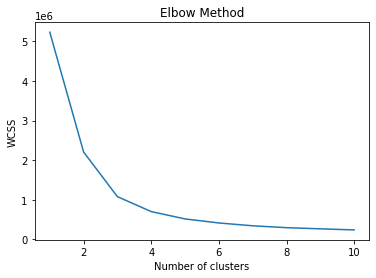

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(spotify_4_feat)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key